# Credit Risk Analysis using KNN

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

# 1.Loading and Understanding the dataset

In [3]:
df_loan=pd.read_csv('pinjam.csv')
df_loan

ParserError: Error tokenizing data. C error: Expected 74 fields in line 44, saw 33802


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [38]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


# 2. Removing Irrelevant coloumn

In [112]:
df_loan.drop(df_loan.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]), 1, inplace=True)

In [104]:
df_loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             4
verification_status    0
purpose                0
dtype: int64

In [113]:
df_loan.annual_inc = df_loan.annual_inc.fillna(0)
df_loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dtype: int64

## 3. Create label Coloumn : Description about loan status

In [114]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df_loan.loc[:, 'label'] = df_loan['loan_status'].apply(classify_label)
df_loan = df_loan.drop('loan_status', axis=1)

KeyError: 'loan_status'

In [82]:
df_loan['label']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
887374    0.0
887375    0.0
887376    0.0
887377    0.0
887378    0.0
Name: label, Length: 887379, dtype: float64

In [69]:
df_loan['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
887374        Current
887375        Current
887376        Current
887377        Current
887378        Current
Name: loan_status, Length: 887379, dtype: object

In [83]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0
    

In [84]:
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [85]:
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0
    
df_loan["grade"] = df_loan["grade"].apply(SC_LabelEncoder1)
df_loan["emp_length"] = df_loan["emp_length"].apply(SC_LabelEncoder2)
df_loan["home_ownership"] = df_loan["home_ownership"].apply(SC_LabelEncoder3)

In [86]:
df_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,label
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,4,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,3,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,3,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,3,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,4,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,5,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,3,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,1,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,0,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,4,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


ValueError: Could not interpret input 'label'

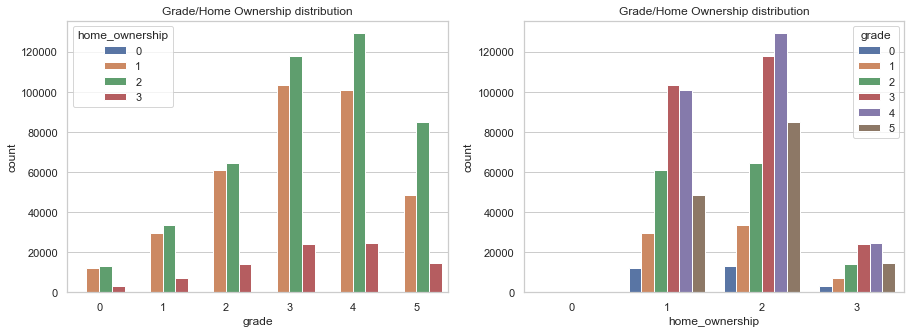

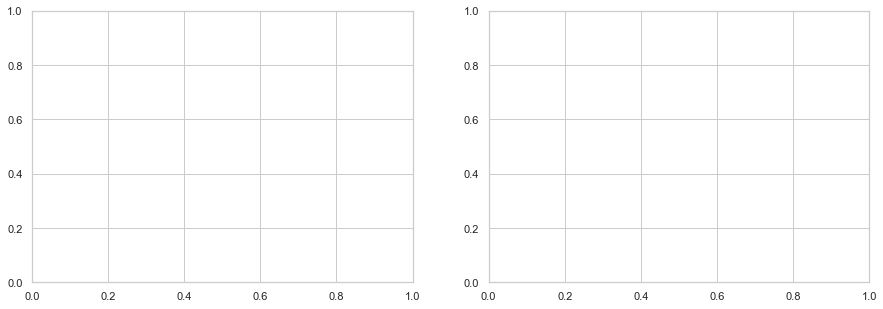

In [108]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df_loan, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df_loan, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

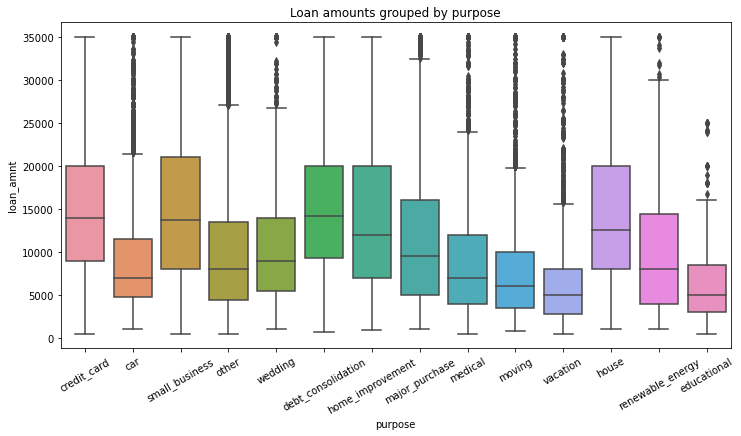

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_loan)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

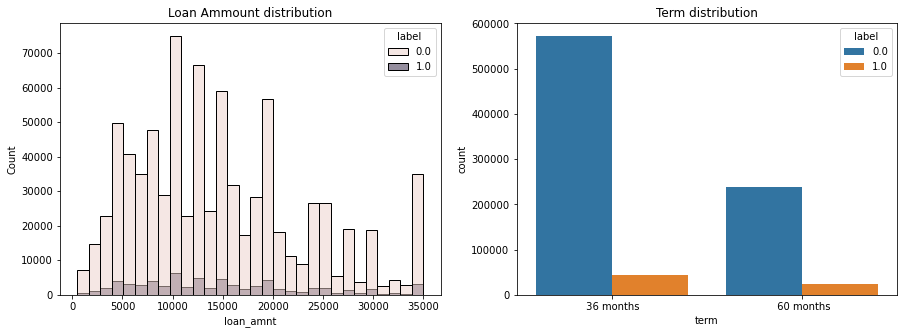

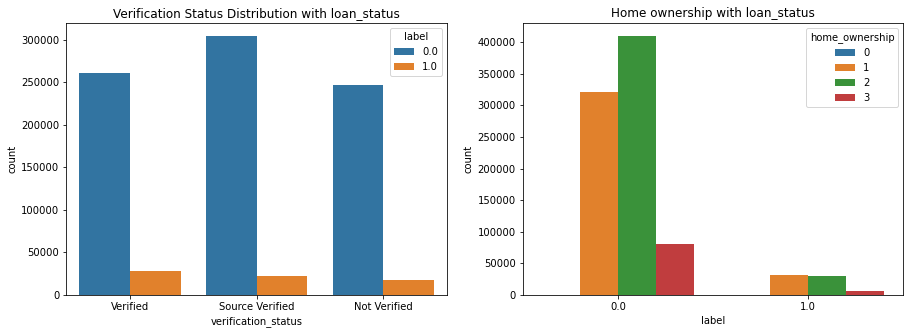

In [91]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_loan, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df_loan, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df_loan, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

<ipython-input-92-6ad682432b0f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


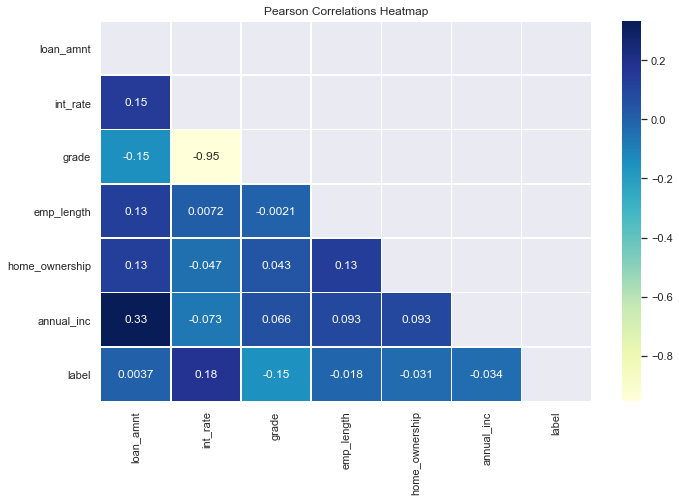

In [92]:
corr = df_loan[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [95]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df_loan[col])
    df_loan[col] = le.transform(df_loan[col])
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,label
0,1077501,1296599,5000.0,5000.0,4975.0,0,10.65,162.87,4,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,1,15.27,59.83,3,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1077175,1313524,2400.0,2400.0,2400.0,0,15.96,84.33,3,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1076863,1277178,10000.0,10000.0,10000.0,0,13.49,339.31,3,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1075358,1311748,3000.0,3000.0,3000.0,1,12.69,67.79,4,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [96]:
df_loan.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
label                 8460
Length: 74, dtype: int64

# 6.Clustering

In [97]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_loan)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

ValueError: could not convert string to float: 'B2'

In [98]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(df_loan)

ValueError: could not convert string to float: 'B2'

In [99]:
df_clustered = df_loan[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

NameError: name 'clusters' is not defined

# 7. Predicting Risk: Using the K-Nearest Neighbors Classification Model¶# 7. Predicting Risk: Using the K-Nearest Neighbors Classification Model

In [100]:
X, y = df_loan.drop("label", axis=1), df_loan["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [101]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

ValueError: could not convert string to float: 'C4'

In [102]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 0  to get the best prediction, then the average accuracy is  0
